# Ejercicios de Seaborn

In [ ]:
# 1. Importa pandas, pyplot y seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 2. Activa matplotlib de forma estática

In [2]:
%matplotlib inline

In [3]:
# 3. Lee 'Pokemon.csv', lee la primera columna del csv como índice del DataFrame

In [3]:
df = pd.read_csv('Pokemon.csv',
encoding= 'latin1',
index_col= 0)

In [ ]:
# 4. Mira las primeras filas del dataset para hacerte una idea de los datos cargados

In [4]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [ ]:
# 5. Haz un scatter plot con lmplot(), que es el método que pinta una regresión lineal
# Pasa el DataFrame como argumento del método en el parámetro llamado data

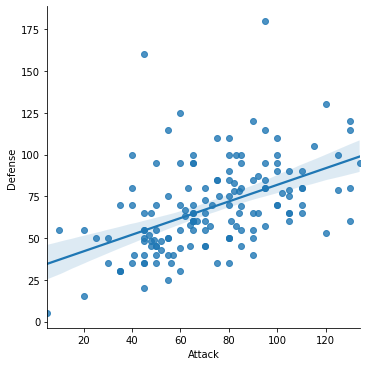

In [6]:
sns.lmplot(x='Attack', y='Defense', data= df);

In [ ]:
# 6. No queremos ver la línea recta de la regresión lineal.
# prueba a añadir fit_reg a falso

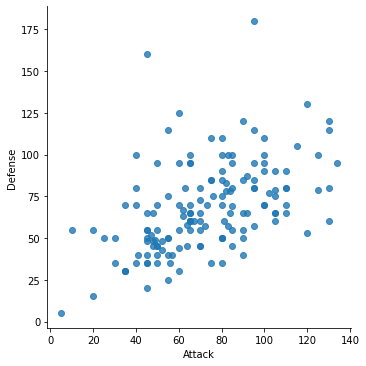

In [7]:
sns.lmplot(x='Attack', y='Defense', data= df, fit_reg= False);

In [ ]:
# 7. Vamos a decir qué variable (columna del DataFrame) codifica los colores (hue)
# Que el hue sea el Stage

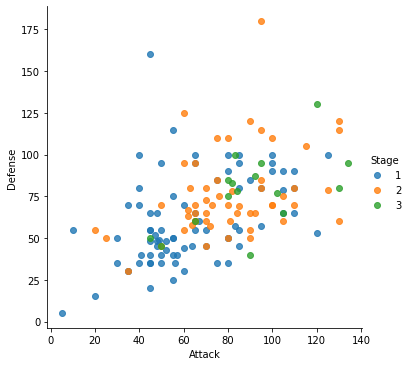

In [8]:
sns.lmplot(x='Attack',
 y='Defense',
  data= df,
  fit_reg= False,
  hue= 'Stage');

In [ ]:
# 8. Limita el eje x entre 20 y 100

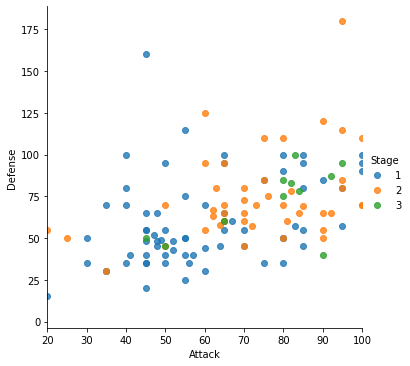

In [11]:
grafica = sns.lmplot(x='Attack',
 y='Defense',
  data= df,
  fit_reg= False,
  hue= 'Stage');
plt.xlim(20, 100);
#grafica.set(xlim = (20,100));

In [ ]:
# 9. Dibuja un diagrama de cajas con el dataframe

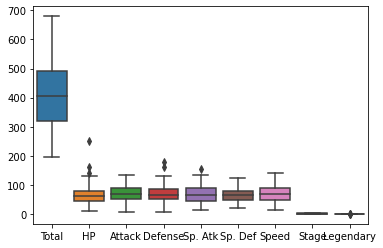

In [12]:
sns.boxplot(data= df);

In [ ]:
# 10. No nos interesan las columnas Total, Stage ni Legendary
# Bórralos del DataFrame y vuelve a dibujar el diagrama de cajas

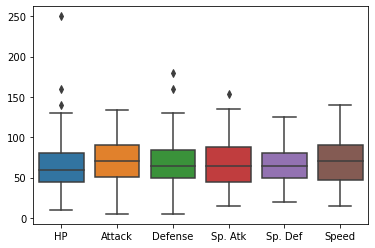

In [13]:
df_reducido = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
sns.boxplot(data= df_reducido);

In [ ]:
# 11. Mira cuántos 'Type 1' diferentes hay en el DataFrame

In [14]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon'], dtype=object)

In [ ]:
# 12. Quédate del Dataframe solo con los 'Type 1' iguales a 'Grass', 'Fire' o 'Water'

In [16]:
df_grass_fire_water = df[df['Type 1'].isin(['Grass', 'Fire', 'Water'])]
df_grass_fire_water['Type 1'].unique()

array(['Grass', 'Fire', 'Water'], dtype=object)

In [ ]:
# 13. Usa un estilo 'whitegrid'

In [18]:
sns.set_style('whitegrid')

In [ ]:
# 14. Pinta diagramas de violín con el DataFrame

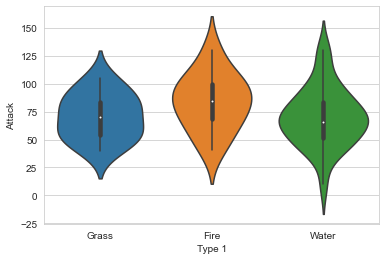

In [19]:
sns.violinplot(data= df_grass_fire_water,
x= 'Type 1',
y= 'Attack');

In [ ]:
# 15. Escribe una lista de colores con valores '#78C850', '#F08030',  '#6890F0'

In [20]:
pokemon_colores = ['#78C850', '#F08030',  '#6890F0']

In [ ]:
# 16. Pinta de nuevo los diagramas de violín añadiendo esos colores en la paleta (palette)

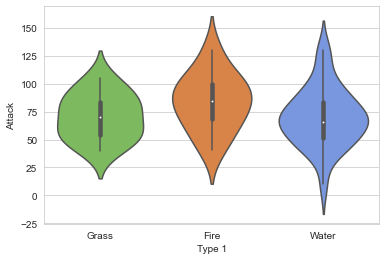

In [23]:
sns.violinplot(data= df_grass_fire_water,
x= 'Type 1',
y= 'Attack',
palette= pokemon_colores);

In [ ]:
# 17. Con el diagrama de violín vemos la forma de la distribución, pero no sabemos si Grass tiene muchos puntos y Fire tiene muy pocos.
# Para ver esto, usamos el swarmplot.
# Pinta el último diagrama de violines pero con un swarmplot en lugar de un violin

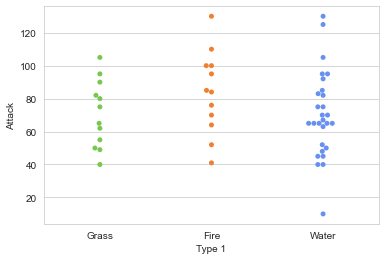

In [29]:
sns.swarmplot(data= df_grass_fire_water,
x= 'Type 1',
y= 'Attack',
palette= pokemon_colores);

In [ ]:
# 18. Queremos ver los violines a la vez que los swarm, los podemos pintar juntos. 
# Elimina los diagramas de caja dentro de los violines con el parámetro inner = None y pon una transparencia de 0.9
# Pon un título con pyplot (como siempre)

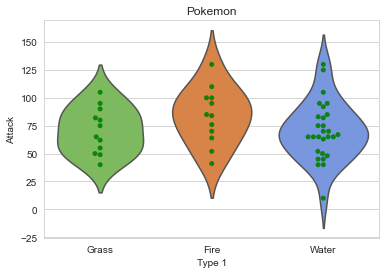

In [30]:
sns.violinplot(data= df_grass_fire_water,
x= 'Type 1',
y= 'Attack',
inner= None,
palette= pokemon_colores);

sns.swarmplot(data= df_grass_fire_water,
x= 'Type 1',
y= 'Attack',
color= 'green',
alpha= 0.9);

plt.title('Pokemon');

In [ ]:
# 19. Veamos la función melt() de pandas. Melt toma los valores de varias columnas y los junta todos en una misma columna nueva.
# Dado un DataFrame, melt recibe varios parámetros:
# * qué columnas del DataFrame se quedan igual
# * qué nombres de columnas del dataframe pasan a ser una columna nueva
# * cómo queremos llamar esas nuevas columnas

# Primero recuerda el Dataframe df_grass_fire_water con las primeras 5 filas

In [34]:
pd_melted = df_grass_fire_water.melt(id_vars= ['Name', 'Type 1'], 
value_vars= ['HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Stage', 'Legendary'], 
var_name= 'Melted')

In [ ]:
# 20. Queremos dejar igual las variables 'Name' y 'Type 1'
# Queremos añadir una columa nueva cuyos valores sean las columnas que queremos apilar y que se llame 'New Column'
# Escribimos df_grass_fire_water.melt(id_vars=['Name', 'Type 1'], value_vars=[...], var_name='New Column')

In [35]:
pd_melted = df_grass_fire_water.melt(id_vars= ['Name', 'Type 1'], 
value_vars= ['HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Stage', 'Legendary'], 
var_name= 'Melted')

In [ ]:
# 21. Pintamos el swarmplot con el melted y entendemos la información

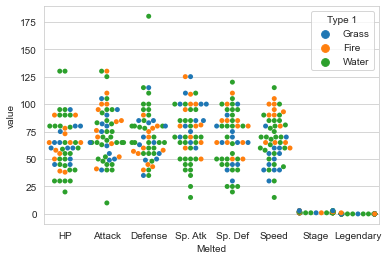

In [37]:
sns.swarmplot(x= 'Melted',
 y= 'value',
  hue= 'Type 1',
   data= pd_melted);

In [ ]:
# 22. Basándote en el gráfico anterior, define el tamaño de la figura en (10,6) (usa plt)
# En el swarmplot añade el argumento dodge a True y usa la anterior paleta de colores Pokemon

# Dodge en inglés es "esquivar", ¿qué diferencia ves?

# Usando plt 
# fija el límite del eje Y entre 0 y 200
# fija la leyenda con bbox_to_anchor en upper left. Pista: upper left es el código 2 y se usa el parámetro loc.


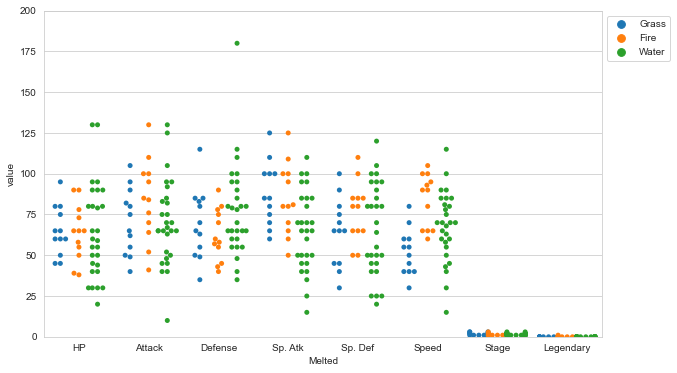

In [40]:
plt.figure(figsize=(10,6))
sns.swarmplot(x = 'Melted',
              y='value',
              hue = 'Type 1',
              dodge = True,
              data = pd_melted);
plt.ylim(0, 200)
plt.legend(bbox_to_anchor = (1,1), loc = 2);

In [ ]:
# Observa que incluso usando Seaborn, usamos Pyplot para trabajar con los ejes, la leyenda y el tamaño
# Lo importante es que Seaborn y Pyplot conviven bien juntos

In [ ]:
# 23. Mapas de calor
# Calcula las correlaciones del primer DataFrame original df
# Pista: las correlaciones se calculan con el método corr()
# Recuerda: las correlaciones miden entre dos variables, si varío una, cuánto me varía la otra (cómo están de relacionadas)

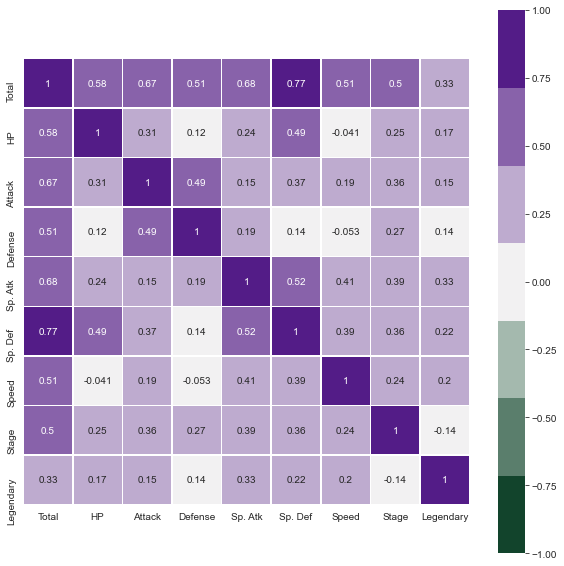

In [43]:
correlaciones = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlaciones,
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=0.5);

In [ ]:
# ¿la correlación entre qué valores se encuentra?
# la autocorrelación es la correlación de una variable consigo misma, ¿qué aprecias?
# Encuentra dos variables que veas que están fuertemente relacionadas según la correlación
# Si tuvieras una matriz de correlación muy grande y te cobrasen por cada dato que lees, ¿qué harías?

In [ ]:
# 24. Pinta el histograma y la densidad de probabilidad del nivel de defensa usando el DataFrame original

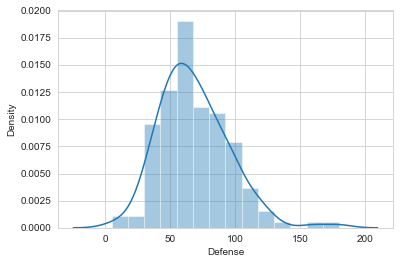

In [45]:
sns.distplot(df.Defense);

In [ ]:
# 25. Pinta un diagrama de barras de la columna 'Type 1' usando el DataFrame original
# Usa un sns.countplot
# Usa plt.xticks y gira las etiquetas

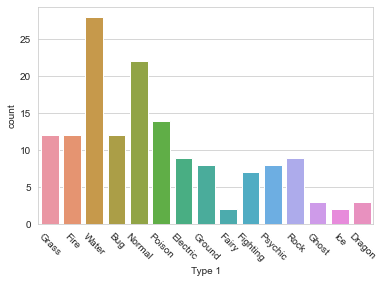

In [48]:
sns.countplot(data= df, x = 'Type 1')
plt.xticks(rotation = -45);

In [ ]:
# 26. Usa catplot con el DataFrame original. Muestra el valor de Defense según el 'Type 1', muestra un subplot para legendarios y otro para no legendarios
# y divide los colores según el Type 2

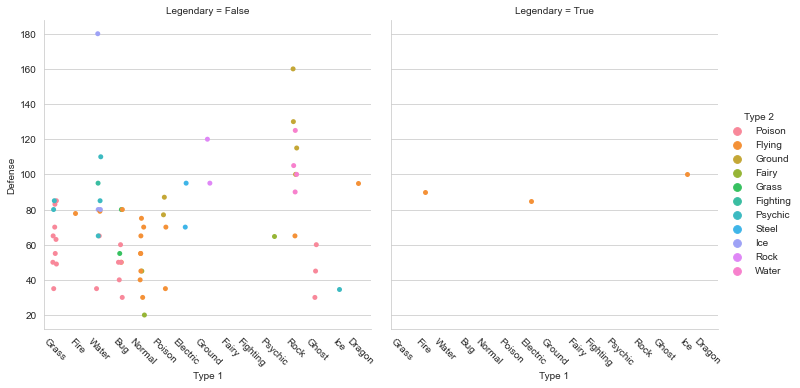

In [53]:
grafica = sns.catplot(data= df,
x= 'Type 1',
y= 'Defense',
col= 'Legendary',
hue= 'Type 2');

grafica.set_xticklabels(rotation = -45);

In [ ]:
# 27. Muestra una función distribución de probabilidad con kdeplot (curvas de nivel) de la defensa respecto al ataque.
# Di un bin 2D donde caigan muchos puntos (ataque, defensa).

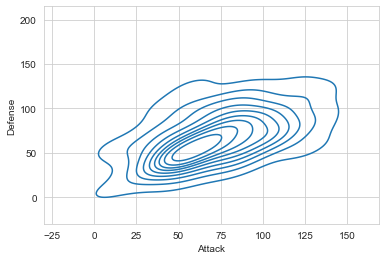

In [55]:
sns.kdeplot(df.Attack, df.Defense);

In [ ]:
# 29. Pinta una distribución de probabilidad conjunta, pintando la defensa respecto al ataque del DataFrame original

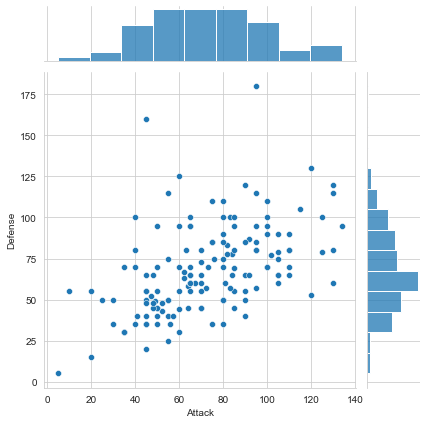

In [56]:
sns.jointplot(data= df,
x= 'Attack',
y= 'Defense');